<a href="https://colab.research.google.com/github/Victoresteban-bit/METODOS-NUMERICS/blob/main/Funcion_Runge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nodos de Chevyshev y Fenomeno de Runge
Sabemos que el error de interpolacion en $[x_0,x_n]$ esta dado por: $$f(x)-P(x)=\frac{1}{(n+1)!}f^{(n+1)}(c)\prod_{i=0}^{n}(x-x_i)$$ donde $c\in(x_0,x_n)$. Y, en $[-1,1]$, el error maximo esta dado por $$\max_{-1\leq x\leq1}|f(x)-P(x)|.$$

Runge observo que en los extremos del intervalo una extrema oscilacion de polinomios interpoladores de grado alto con puntos uniformemente espaciados $$\lim_{n\to\infty}|f(x)-P_n(x)|=∞$$

Chevyshev mostro que, en $[-1,1]$, la oscilacion se minimiza si se escojen los nodos de la forma $$\prod_{i=0}^{n}(x-x_i)=\frac{1}{2^n}T_{n+1}(x)$$ donde $T_{n+1}(x)$ es el polinomio de Chevyshev de grado $n+1$

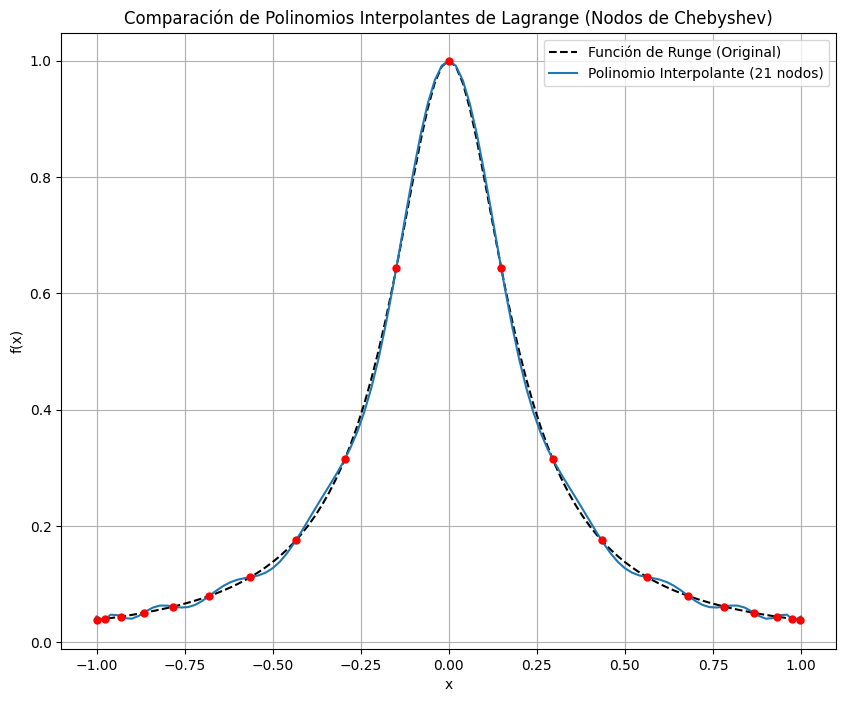

[ 9.97203797e-01  9.74927912e-01  9.30873749e-01  8.66025404e-01
  7.81831482e-01  6.80172738e-01  5.63320058e-01  4.33883739e-01
  2.94755174e-01  1.49042266e-01  6.12323400e-17 -1.49042266e-01
 -2.94755174e-01 -4.33883739e-01 -5.63320058e-01 -6.80172738e-01
 -7.81831482e-01 -8.66025404e-01 -9.30873749e-01 -9.74927912e-01
 -9.97203797e-01]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Función de Runge
def runge_function(x):
  return 1 / (1 + 25 * x**2)

# Función para calcular nodos de Chebyshev en [a, b]
def chebyshev_nodes(n, a, b):
  k = np.arange(1, n + 1)
  nodes = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))
  return nodes

# Intervalo
a, b = -1, 1

# Crear figura para las gráficas
plt.figure(figsize=(10, 8))

# Valores de n para los nodos
n_values = [7, 9, 11, 21]

# Puntos para graficar las funciones
x_plot = np.linspace(a, b, 101)
y_runge = runge_function(x_plot)

# Graficar la función de Runge original
plt.plot(x_plot, y_runge, label='Función de Runge (Original)', color='black', linestyle='--')

# Calcular y graficar los polinomios interpolantes para cada n
for n in n_values:
  # Calcular nodos de Chebyshev
  nodes = chebyshev_nodes(n, a, b)
  # Calcular valores de la función en los nodos
  values = runge_function(nodes)

  # Construir el polinomio interpolante de Lagrange
  poly = lagrange(nodes, values)

  # Evaluar el polinomio en los puntos de graficación
  y_interp = poly(x_plot)

  # Graficar el polinomio interpolante
  plt.plot(x_plot, y_interp, label=f'Polinomio Interpolante ({n} nodos)')

  # Graficar los nodos de Chebyshev
  plt.plot(nodes, values, 'o', color='red', markersize=5)

# Configurar la gráfica
plt.title('Comparación de Polinomios Interpolantes de Lagrange (Nodos de Chebyshev)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(nodes)